In [1]:
%load_ext autoreload
%autoreload 2

import os
from jax import config
config.update("jax_enable_x64", True)

os.environ["CUDA_DEVICE_ORDER"] = "PCI_BUS_ID" 
os.environ["CUDA_VISIBLE_DEVICES"] = '2'
from encoding_information.gpu_utils import limit_gpu_memory_growth
limit_gpu_memory_growth()

from cleanplots import *
import jax.numpy as np
from jax.scipy.special import logsumexp
import numpy as onp
from encoding_information.image_utils import *
from encoding_information.information_estimation import *


2024-01-23 13:04:19.884264: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [4]:
initial_measurements = {}
final_measurements = {}
for file in os.listdir('/home/emarkley/Workspace/PYTHON/MeldDiffuserScope/data_for_henry/'):
    if file.endswith('.pt.npy'):
        print(file)
        data = np.load('/home/emarkley/Workspace/PYTHON/MeldDiffuserScope/data_for_henry/' + file)
        if '0' in file:
            initial_measurements = data
        else:
            final_measurements = data

newLung_measurementsiteration_0.pt.npy
newLung_measurementsiteration_15.pt.npy


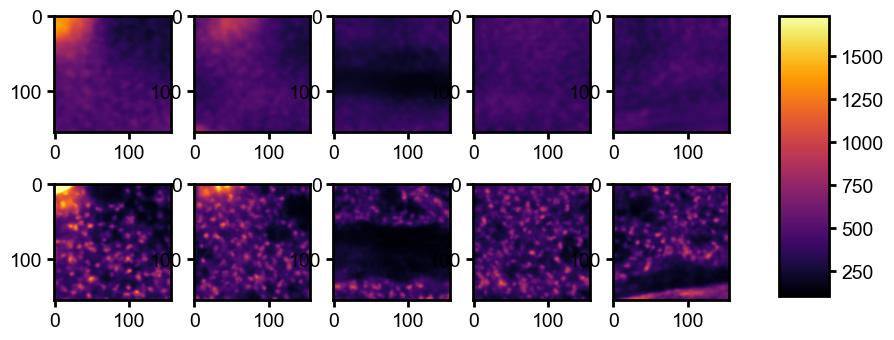

In [7]:

initial_images = initial_measurements
final_images = final_measurements

data_min = min(initial_images.min(), final_images.min())
data_max = max(initial_images.max(), final_images.max())

vmin = np.percentile(np.stack([initial_images, final_images]), 1)
vmax = np.percentile(np.stack([initial_images, final_images]), 99)

# plot 5 of the initial and final measurements
fig, axs = plt.subplots(2, 5, figsize=(10, 4))
for i, ax in enumerate(axs[0]):
    ax.imshow(initial_images[i], vmin=vmin, vmax=vmax, cmap='inferno')


for i, ax in enumerate(axs[1]):
    ax.imshow(final_images[i], vmin=vmin, vmax=vmax, cmap='inferno')

# show a shared colorbar
fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.85, 0.15, 0.05, 0.7])
fig.colorbar(axs[0, 0].get_images()[0], cax=cbar_ax)


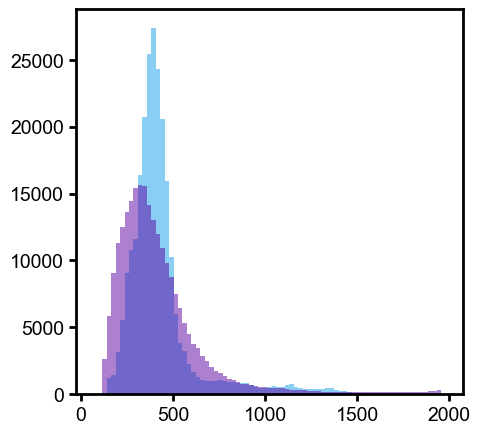

In [8]:

# plot the histograms of the initial and final measurements
fig, axs = plt.subplots(1, 1, figsize=(5, 5))
bins = np.linspace(data_min, data_max, 80)

_ = axs.hist(initial_images[:10].ravel(), bins=bins, alpha=0.5)
_ = axs.hist(final_images[:10].ravel(), bins=bins, alpha=0.5)

# patches from everywhere

In [9]:
patch_size = 25

initial_patches = extract_patches(initial_images, patch_size=patch_size, num_patches=5000, verbose=True)
final_patches = extract_patches(final_images, patch_size=patch_size, num_patches=5000, verbose=True)

initial_noisy_patches = add_noise(initial_patches)
final_noisy_patches = add_noise(final_patches)

initial_mi = estimate_mutual_information(initial_noisy_patches, clean_images=initial_patches, entropy_model='pixel_cnn', verbose=True)
final_mi = estimate_mutual_information(final_noisy_patches, clean_images=final_patches, entropy_model='pixel_cnn', verbose=True)

print('Initial MI: ', initial_mi)
print('Final MI: ', final_mi)

100%|██████████| 5000/5000 [00:35<00:00, 142.38it/s]
2024-01-23 13:09:21.120194: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1956] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


Initial validation NLL: 149.68


Epoch 1: 100%|██████████| 100/100 [00:15<00:00,  6.47it/s]


Epoch 1: validation NLL: 5.80


Epoch 2: 100%|██████████| 100/100 [00:07<00:00, 13.83it/s]


Epoch 2: validation NLL: 4.99


Epoch 3: 100%|██████████| 100/100 [00:06<00:00, 14.94it/s]


Epoch 3: validation NLL: 4.66


Epoch 4: 100%|██████████| 100/100 [00:06<00:00, 14.99it/s]


Epoch 4: validation NLL: 4.88


Epoch 5: 100%|██████████| 100/100 [00:06<00:00, 15.15it/s]


Epoch 5: validation NLL: 4.56


Epoch 6: 100%|██████████| 100/100 [00:06<00:00, 15.20it/s]


Epoch 6: validation NLL: 4.58


Epoch 7: 100%|██████████| 100/100 [00:06<00:00, 15.37it/s]


Epoch 7: validation NLL: 4.54


Epoch 8: 100%|██████████| 100/100 [00:06<00:00, 15.54it/s]


Epoch 8: validation NLL: 4.54


Epoch 9: 100%|██████████| 100/100 [00:06<00:00, 15.47it/s]


Epoch 9: validation NLL: 4.52


Epoch 10: 100%|██████████| 100/100 [00:06<00:00, 15.42it/s]


Epoch 10: validation NLL: 4.51


Epoch 11: 100%|██████████| 100/100 [00:06<00:00, 15.18it/s]


Epoch 11: validation NLL: 4.58


Epoch 12: 100%|██████████| 100/100 [00:06<00:00, 15.29it/s]


Epoch 12: validation NLL: 4.49


Epoch 13: 100%|██████████| 100/100 [00:06<00:00, 15.16it/s]


Epoch 13: validation NLL: 4.57


Epoch 14: 100%|██████████| 100/100 [00:06<00:00, 15.41it/s]


Epoch 14: validation NLL: 4.49


Epoch 15: 100%|██████████| 100/100 [00:06<00:00, 14.99it/s]


Epoch 15: validation NLL: 4.54


Epoch 16: 100%|██████████| 100/100 [00:06<00:00, 15.60it/s]


Epoch 16: validation NLL: 4.50


Epoch 17: 100%|██████████| 100/100 [00:06<00:00, 15.20it/s]


Epoch 17: validation NLL: 4.52


Epoch 18: 100%|██████████| 100/100 [00:06<00:00, 15.31it/s]


Epoch 18: validation NLL: 4.65


Epoch 19: 100%|██████████| 100/100 [00:06<00:00, 15.69it/s]


Epoch 19: validation NLL: 4.65


Epoch 20: 100%|██████████| 100/100 [00:06<00:00, 15.44it/s]


Epoch 20: validation NLL: 4.64


Epoch 21: 100%|██████████| 100/100 [00:06<00:00, 15.50it/s]


Epoch 21: validation NLL: 4.51


Epoch 22: 100%|██████████| 100/100 [00:06<00:00, 15.11it/s]


Epoch 22: validation NLL: 4.56


Epoch 23: 100%|██████████| 100/100 [00:06<00:00, 15.21it/s]


Epoch 23: validation NLL: 4.52


Epoch 24: 100%|██████████| 100/100 [00:06<00:00, 15.47it/s]


Epoch 24: validation NLL: 4.54


Epoch 25: 100%|██████████| 100/100 [00:06<00:00, 15.27it/s]


Epoch 25: validation NLL: 4.53


Epoch 26: 100%|██████████| 100/100 [00:06<00:00, 15.42it/s]


Epoch 26: validation NLL: 4.50


Epoch 27: 100%|██████████| 100/100 [00:06<00:00, 15.23it/s]


Epoch 27: validation NLL: 4.50


Epoch 28: 100%|██████████| 100/100 [00:06<00:00, 15.40it/s]


Epoch 28: validation NLL: 4.52


Epoch 29: 100%|██████████| 100/100 [00:06<00:00, 15.04it/s]


Epoch 29: validation NLL: 4.50


Epoch 30: 100%|██████████| 100/100 [00:06<00:00, 15.38it/s]


Epoch 30: validation NLL: 4.50


Epoch 31: 100%|██████████| 100/100 [00:06<00:00, 15.68it/s]


Epoch 31: validation NLL: 4.49


Epoch 32: 100%|██████████| 100/100 [00:06<00:00, 14.90it/s]


Epoch 32: validation NLL: 4.52


Epoch 33: 100%|██████████| 100/100 [00:06<00:00, 14.84it/s]


Epoch 33: validation NLL: 4.50


Epoch 34: 100%|██████████| 100/100 [00:06<00:00, 15.05it/s]


Epoch 34: validation NLL: 4.48


Epoch 35: 100%|██████████| 100/100 [00:06<00:00, 15.52it/s]


Epoch 35: validation NLL: 4.51


Epoch 36: 100%|██████████| 100/100 [00:06<00:00, 15.24it/s]


Epoch 36: validation NLL: 4.50


Epoch 37: 100%|██████████| 100/100 [00:06<00:00, 15.26it/s]


Epoch 37: validation NLL: 4.49


Epoch 38: 100%|██████████| 100/100 [00:06<00:00, 15.71it/s]


Epoch 38: validation NLL: 4.48


Epoch 39: 100%|██████████| 100/100 [00:06<00:00, 15.39it/s]


Epoch 39: validation NLL: 4.50


Epoch 40: 100%|██████████| 100/100 [00:06<00:00, 15.26it/s]


Epoch 40: validation NLL: 4.48


Epoch 41: 100%|██████████| 100/100 [00:06<00:00, 15.37it/s]


Epoch 41: validation NLL: 4.50


Epoch 42: 100%|██████████| 100/100 [00:06<00:00, 15.53it/s]


Epoch 42: validation NLL: 4.49


Epoch 43: 100%|██████████| 100/100 [00:06<00:00, 14.89it/s]


Epoch 43: validation NLL: 4.53


Epoch 44: 100%|██████████| 100/100 [00:06<00:00, 15.49it/s]


Epoch 44: validation NLL: 4.58


Epoch 45: 100%|██████████| 100/100 [00:06<00:00, 14.94it/s]


Epoch 45: validation NLL: 4.49


Epoch 46: 100%|██████████| 100/100 [00:06<00:00, 15.53it/s]


Epoch 46: validation NLL: 4.51


Epoch 47: 100%|██████████| 100/100 [00:06<00:00, 15.40it/s]


Epoch 47: validation NLL: 4.51


Epoch 48: 100%|██████████| 100/100 [00:06<00:00, 15.41it/s]


Epoch 48: validation NLL: 4.51


Epoch 49: 100%|██████████| 100/100 [00:06<00:00, 15.49it/s]


Epoch 49: validation NLL: 4.47


Epoch 50: 100%|██████████| 100/100 [00:06<00:00, 15.93it/s]


Epoch 50: validation NLL: 4.47


Epoch 51: 100%|██████████| 100/100 [00:06<00:00, 15.48it/s]


Epoch 51: validation NLL: 4.48


Epoch 52: 100%|██████████| 100/100 [00:06<00:00, 15.55it/s]


Epoch 52: validation NLL: 4.49


Epoch 53: 100%|██████████| 100/100 [00:06<00:00, 16.30it/s]


Epoch 53: validation NLL: 4.48


Epoch 54: 100%|██████████| 100/100 [00:06<00:00, 15.24it/s]


Epoch 54: validation NLL: 4.49


Epoch 55: 100%|██████████| 100/100 [00:06<00:00, 15.41it/s]


Epoch 55: validation NLL: 4.68


Epoch 56: 100%|██████████| 100/100 [00:06<00:00, 16.01it/s]


Epoch 56: validation NLL: 4.51


Epoch 57: 100%|██████████| 100/100 [00:06<00:00, 15.35it/s]


Epoch 57: validation NLL: 4.52


Epoch 58: 100%|██████████| 100/100 [00:06<00:00, 15.91it/s]


Epoch 58: validation NLL: 4.49


Epoch 59: 100%|██████████| 100/100 [00:06<00:00, 15.55it/s]


Epoch 59: validation NLL: 4.50


Epoch 60: 100%|██████████| 100/100 [00:06<00:00, 15.71it/s]


Epoch 60: validation NLL: 4.48


Epoch 61: 100%|██████████| 100/100 [00:06<00:00, 15.58it/s]


Epoch 61: validation NLL: 4.51


Epoch 62: 100%|██████████| 100/100 [00:06<00:00, 15.25it/s]


Epoch 62: validation NLL: 4.49


Epoch 63: 100%|██████████| 100/100 [00:06<00:00, 15.40it/s]


Epoch 63: validation NLL: 4.48


Epoch 64: 100%|██████████| 100/100 [00:06<00:00, 16.01it/s]


Epoch 64: validation NLL: 4.54


Epoch 65: 100%|██████████| 100/100 [00:06<00:00, 15.81it/s]


Epoch 65: validation NLL: 4.50


Epoch 66: 100%|██████████| 100/100 [00:06<00:00, 15.78it/s]


Epoch 66: validation NLL: 4.47


Epoch 67: 100%|██████████| 100/100 [00:06<00:00, 15.60it/s]


Epoch 67: validation NLL: 4.48


Epoch 68: 100%|██████████| 100/100 [00:06<00:00, 15.41it/s]


Epoch 68: validation NLL: 4.49


Epoch 69: 100%|██████████| 100/100 [00:06<00:00, 15.95it/s]


Epoch 69: validation NLL: 4.49


Epoch 70: 100%|██████████| 100/100 [00:06<00:00, 15.30it/s]


Epoch 70: validation NLL: 4.50


Epoch 71: 100%|██████████| 100/100 [00:06<00:00, 15.75it/s]


Epoch 71: validation NLL: 4.56


Epoch 72: 100%|██████████| 100/100 [00:06<00:00, 16.07it/s]


Epoch 72: validation NLL: 4.51


Epoch 73: 100%|██████████| 100/100 [00:06<00:00, 15.61it/s]


Epoch 73: validation NLL: 4.56


Epoch 74: 100%|██████████| 100/100 [00:06<00:00, 15.28it/s]


Epoch 74: validation NLL: 4.49


Epoch 75: 100%|██████████| 100/100 [00:06<00:00, 15.61it/s]


Epoch 75: validation NLL: 4.48


Epoch 76: 100%|██████████| 100/100 [00:06<00:00, 15.78it/s]


Epoch 76: validation NLL: 4.48


Epoch 77: 100%|██████████| 100/100 [00:06<00:00, 15.82it/s]


Epoch 77: validation NLL: 4.48


Epoch 78: 100%|██████████| 100/100 [00:06<00:00, 15.60it/s]


Epoch 78: validation NLL: 4.49


Epoch 79: 100%|██████████| 100/100 [00:06<00:00, 16.05it/s]


Epoch 79: validation NLL: 4.47


Epoch 80: 100%|██████████| 100/100 [00:06<00:00, 15.65it/s]


Epoch 80: validation NLL: 4.51


Epoch 81: 100%|██████████| 100/100 [00:06<00:00, 16.08it/s]


Epoch 81: validation NLL: 4.49


Epoch 82: 100%|██████████| 100/100 [00:06<00:00, 15.36it/s]


Epoch 82: validation NLL: 4.48


Epoch 83: 100%|██████████| 100/100 [00:06<00:00, 15.89it/s]


Epoch 83: validation NLL: 4.49


Epoch 84: 100%|██████████| 100/100 [00:06<00:00, 15.44it/s]


Epoch 84: validation NLL: 4.50


Epoch 85: 100%|██████████| 100/100 [00:06<00:00, 15.55it/s]


Epoch 85: validation NLL: 4.48


Epoch 86: 100%|██████████| 100/100 [00:06<00:00, 15.58it/s]


Epoch 86: validation NLL: 4.49


Epoch 87: 100%|██████████| 100/100 [00:06<00:00, 15.45it/s]


Epoch 87: validation NLL: 4.47


Epoch 88: 100%|██████████| 100/100 [00:06<00:00, 15.87it/s]


Epoch 88: validation NLL: 4.48


Epoch 89: 100%|██████████| 100/100 [00:06<00:00, 16.00it/s]


Epoch 89: validation NLL: 4.53


Epoch 90: 100%|██████████| 100/100 [00:06<00:00, 15.31it/s]


Epoch 90: validation NLL: 4.47


Epoch 91: 100%|██████████| 100/100 [00:06<00:00, 16.02it/s]


Epoch 91: validation NLL: 4.50


Epoch 92: 100%|██████████| 100/100 [00:06<00:00, 15.21it/s]


Epoch 92: validation NLL: 4.48


Epoch 93: 100%|██████████| 100/100 [00:06<00:00, 15.25it/s]


Epoch 93: validation NLL: 4.48


Epoch 94: 100%|██████████| 100/100 [00:06<00:00, 15.34it/s]


Epoch 94: validation NLL: 4.48


Epoch 95: 100%|██████████| 100/100 [00:06<00:00, 15.20it/s]


Epoch 95: validation NLL: 4.48


Epoch 96: 100%|██████████| 100/100 [00:06<00:00, 15.23it/s]


Epoch 96: validation NLL: 4.47


Epoch 97: 100%|██████████| 100/100 [00:06<00:00, 15.86it/s]


Epoch 97: validation NLL: 4.48


Epoch 98: 100%|██████████| 100/100 [00:06<00:00, 15.27it/s]


Epoch 98: validation NLL: 4.50


Epoch 99: 100%|██████████| 100/100 [00:06<00:00, 15.65it/s]


Epoch 99: validation NLL: 4.47


Epoch 100: 100%|██████████| 100/100 [00:06<00:00, 15.98it/s]


Epoch 100: validation NLL: 4.51


Epoch 101: 100%|██████████| 100/100 [00:06<00:00, 15.31it/s]


Epoch 101: validation NLL: 4.52


Epoch 102: 100%|██████████| 100/100 [00:06<00:00, 15.58it/s]


Epoch 102: validation NLL: 4.47


Epoch 103: 100%|██████████| 100/100 [00:06<00:00, 15.64it/s]


Epoch 103: validation NLL: 4.58


Epoch 104: 100%|██████████| 100/100 [00:06<00:00, 15.53it/s]


Epoch 104: validation NLL: 4.49


Epoch 105: 100%|██████████| 100/100 [00:06<00:00, 15.33it/s]


Epoch 105: validation NLL: 4.48


Epoch 106: 100%|██████████| 100/100 [00:06<00:00, 15.29it/s]


Epoch 106: validation NLL: 4.48


Epoch 107: 100%|██████████| 100/100 [00:06<00:00, 15.87it/s]


Epoch 107: validation NLL: 4.48


Epoch 108: 100%|██████████| 100/100 [00:06<00:00, 15.47it/s]


Epoch 108: validation NLL: 4.48


Epoch 109: 100%|██████████| 100/100 [00:06<00:00, 15.18it/s]


Epoch 109: validation NLL: 4.54


Epoch 110: 100%|██████████| 100/100 [00:06<00:00, 15.25it/s]


Epoch 110: validation NLL: 4.48


Epoch 111: 100%|██████████| 100/100 [00:06<00:00, 15.23it/s]


Epoch 111: validation NLL: 4.47


Epoch 112: 100%|██████████| 100/100 [00:06<00:00, 15.13it/s]


Epoch 112: validation NLL: 4.47


Epoch 113: 100%|██████████| 100/100 [00:06<00:00, 14.98it/s]


Epoch 113: validation NLL: 4.48


Epoch 114: 100%|██████████| 100/100 [00:06<00:00, 15.64it/s]


Epoch 114: validation NLL: 4.48


Epoch 115: 100%|██████████| 100/100 [00:06<00:00, 15.17it/s]


Epoch 115: validation NLL: 4.49


Epoch 116: 100%|██████████| 100/100 [00:06<00:00, 15.11it/s]


Epoch 116: validation NLL: 4.49


Epoch 117: 100%|██████████| 100/100 [00:06<00:00, 15.95it/s]


Epoch 117: validation NLL: 4.49


Epoch 118: 100%|██████████| 100/100 [00:06<00:00, 15.13it/s]


Epoch 118: validation NLL: 4.49


Epoch 119: 100%|██████████| 100/100 [00:06<00:00, 15.32it/s]


Epoch 119: validation NLL: 4.48


Epoch 120: 100%|██████████| 100/100 [00:06<00:00, 15.37it/s]


Epoch 120: validation NLL: 4.48


Epoch 121: 100%|██████████| 100/100 [00:06<00:00, 14.99it/s]


Epoch 121: validation NLL: 4.57


Epoch 122: 100%|██████████| 100/100 [00:06<00:00, 15.38it/s]


Epoch 122: validation NLL: 4.48


Epoch 123: 100%|██████████| 100/100 [00:06<00:00, 15.16it/s]


Epoch 123: validation NLL: 4.48


Epoch 124: 100%|██████████| 100/100 [00:06<00:00, 15.81it/s]


Epoch 124: validation NLL: 4.49


Epoch 125: 100%|██████████| 100/100 [00:06<00:00, 15.39it/s]


Epoch 125: validation NLL: 4.51


Epoch 126: 100%|██████████| 100/100 [00:06<00:00, 15.10it/s]


Epoch 126: validation NLL: 4.47


Epoch 127: 100%|██████████| 100/100 [00:06<00:00, 15.45it/s]


Epoch 127: validation NLL: 4.48
Estimated H(Y|X) = 4.377 differential entropy/pixel
Estimated H(Y) (Upper bound) = 4.485 differential entropy/pixel
Estimated I(Y;X) = 0.155 bits/pixel
Initial validation NLL: 181.23


Epoch 1: 100%|██████████| 100/100 [00:09<00:00, 10.29it/s]


Epoch 1: validation NLL: 6.06


Epoch 2: 100%|██████████| 100/100 [00:06<00:00, 15.91it/s]


Epoch 2: validation NLL: 5.22


Epoch 3: 100%|██████████| 100/100 [00:06<00:00, 15.28it/s]


Epoch 3: validation NLL: 4.93


Epoch 4: 100%|██████████| 100/100 [00:06<00:00, 15.40it/s]


Epoch 4: validation NLL: 5.34


Epoch 5: 100%|██████████| 100/100 [00:06<00:00, 15.22it/s]


Epoch 5: validation NLL: 5.10


Epoch 6: 100%|██████████| 100/100 [00:06<00:00, 15.04it/s]


Epoch 6: validation NLL: 5.17


Epoch 7: 100%|██████████| 100/100 [00:06<00:00, 15.51it/s]


Epoch 7: validation NLL: 4.95


Epoch 8: 100%|██████████| 100/100 [00:06<00:00, 15.15it/s]


Epoch 8: validation NLL: 4.73


Epoch 9: 100%|██████████| 100/100 [00:06<00:00, 15.04it/s]


Epoch 9: validation NLL: 4.72


Epoch 10: 100%|██████████| 100/100 [00:06<00:00, 14.88it/s]


Epoch 10: validation NLL: 4.66


Epoch 11: 100%|██████████| 100/100 [00:07<00:00, 14.23it/s]


Epoch 11: validation NLL: 4.68


Epoch 12: 100%|██████████| 100/100 [00:06<00:00, 14.45it/s]


Epoch 12: validation NLL: 4.65


Epoch 13: 100%|██████████| 100/100 [00:06<00:00, 14.97it/s]


Epoch 13: validation NLL: 4.69


Epoch 14: 100%|██████████| 100/100 [00:06<00:00, 15.22it/s]


Epoch 14: validation NLL: 4.89


Epoch 15: 100%|██████████| 100/100 [00:06<00:00, 14.84it/s]


Epoch 15: validation NLL: 4.67


Epoch 16: 100%|██████████| 100/100 [00:06<00:00, 15.88it/s]


Epoch 16: validation NLL: 4.64


Epoch 17: 100%|██████████| 100/100 [00:06<00:00, 15.29it/s]


Epoch 17: validation NLL: 4.66


Epoch 18: 100%|██████████| 100/100 [00:06<00:00, 15.07it/s]


Epoch 18: validation NLL: 4.77


Epoch 19: 100%|██████████| 100/100 [00:06<00:00, 15.48it/s]


Epoch 19: validation NLL: 5.25


Epoch 20: 100%|██████████| 100/100 [00:06<00:00, 15.16it/s]


Epoch 20: validation NLL: 4.66


Epoch 21: 100%|██████████| 100/100 [00:06<00:00, 14.98it/s]


Epoch 21: validation NLL: 4.69


Epoch 22: 100%|██████████| 100/100 [00:06<00:00, 15.04it/s]


Epoch 22: validation NLL: 4.65


Epoch 23: 100%|██████████| 100/100 [00:06<00:00, 14.96it/s]


Epoch 23: validation NLL: 4.63


Epoch 24: 100%|██████████| 100/100 [00:06<00:00, 14.85it/s]


Epoch 24: validation NLL: 4.65


Epoch 25: 100%|██████████| 100/100 [00:06<00:00, 14.80it/s]


Epoch 25: validation NLL: 4.62


Epoch 26: 100%|██████████| 100/100 [00:06<00:00, 15.82it/s]


Epoch 26: validation NLL: 4.71


Epoch 27: 100%|██████████| 100/100 [00:06<00:00, 15.49it/s]


Epoch 27: validation NLL: 4.62


Epoch 28: 100%|██████████| 100/100 [00:06<00:00, 15.00it/s]


Epoch 28: validation NLL: 4.70


Epoch 29: 100%|██████████| 100/100 [00:06<00:00, 15.26it/s]


Epoch 29: validation NLL: 4.62


Epoch 30: 100%|██████████| 100/100 [00:06<00:00, 15.06it/s]


Epoch 30: validation NLL: 4.63


Epoch 31: 100%|██████████| 100/100 [00:06<00:00, 14.95it/s]


Epoch 31: validation NLL: 4.76


Epoch 32: 100%|██████████| 100/100 [00:06<00:00, 14.84it/s]


Epoch 32: validation NLL: 4.62


Epoch 33: 100%|██████████| 100/100 [00:06<00:00, 15.23it/s]


Epoch 33: validation NLL: 4.61


Epoch 34: 100%|██████████| 100/100 [00:06<00:00, 15.02it/s]


Epoch 34: validation NLL: 4.60


Epoch 35: 100%|██████████| 100/100 [00:06<00:00, 15.05it/s]


Epoch 35: validation NLL: 4.65


Epoch 36: 100%|██████████| 100/100 [00:06<00:00, 14.96it/s]


Epoch 36: validation NLL: 4.98


Epoch 37: 100%|██████████| 100/100 [00:06<00:00, 15.00it/s]


Epoch 37: validation NLL: 4.63


Epoch 38: 100%|██████████| 100/100 [00:06<00:00, 15.10it/s]


Epoch 38: validation NLL: 4.69


Epoch 39: 100%|██████████| 100/100 [00:06<00:00, 15.00it/s]


Epoch 39: validation NLL: 4.66


Epoch 40: 100%|██████████| 100/100 [00:06<00:00, 15.65it/s]


Epoch 40: validation NLL: 4.63


Epoch 41: 100%|██████████| 100/100 [00:06<00:00, 15.16it/s]


Epoch 41: validation NLL: 4.61


Epoch 42: 100%|██████████| 100/100 [00:06<00:00, 15.29it/s]


Epoch 42: validation NLL: 4.61


Epoch 43: 100%|██████████| 100/100 [00:06<00:00, 15.20it/s]


Epoch 43: validation NLL: 4.65


Epoch 44: 100%|██████████| 100/100 [00:06<00:00, 15.31it/s]


Epoch 44: validation NLL: 4.62


Epoch 45: 100%|██████████| 100/100 [00:06<00:00, 14.79it/s]


Epoch 45: validation NLL: 4.68


Epoch 46: 100%|██████████| 100/100 [00:06<00:00, 15.27it/s]


Epoch 46: validation NLL: 4.61


Epoch 47: 100%|██████████| 100/100 [00:06<00:00, 15.28it/s]


Epoch 47: validation NLL: 4.60


Epoch 48: 100%|██████████| 100/100 [00:06<00:00, 15.43it/s]


Epoch 48: validation NLL: 4.63


Epoch 49: 100%|██████████| 100/100 [00:06<00:00, 15.24it/s]


Epoch 49: validation NLL: 4.62


Epoch 50: 100%|██████████| 100/100 [00:06<00:00, 14.88it/s]


Epoch 50: validation NLL: 4.68


Epoch 51: 100%|██████████| 100/100 [00:06<00:00, 14.90it/s]


Epoch 51: validation NLL: 4.68


Epoch 52: 100%|██████████| 100/100 [00:06<00:00, 15.15it/s]


Epoch 52: validation NLL: 4.65


Epoch 53: 100%|██████████| 100/100 [00:06<00:00, 14.69it/s]


Epoch 53: validation NLL: 4.62


Epoch 54: 100%|██████████| 100/100 [00:06<00:00, 15.04it/s]


Epoch 54: validation NLL: 4.62


Epoch 55: 100%|██████████| 100/100 [00:06<00:00, 15.23it/s]


Epoch 55: validation NLL: 4.63


Epoch 56: 100%|██████████| 100/100 [00:06<00:00, 15.04it/s]


Epoch 56: validation NLL: 4.60


Epoch 57: 100%|██████████| 100/100 [00:06<00:00, 15.16it/s]


Epoch 57: validation NLL: 4.61


Epoch 58: 100%|██████████| 100/100 [00:06<00:00, 15.12it/s]


Epoch 58: validation NLL: 4.60


Epoch 59: 100%|██████████| 100/100 [00:06<00:00, 15.35it/s]


Epoch 59: validation NLL: 4.61


Epoch 60: 100%|██████████| 100/100 [00:06<00:00, 15.15it/s]


Epoch 60: validation NLL: 4.62


Epoch 61: 100%|██████████| 100/100 [00:06<00:00, 15.25it/s]


Epoch 61: validation NLL: 4.60


Epoch 62: 100%|██████████| 100/100 [00:06<00:00, 14.96it/s]


Epoch 62: validation NLL: 4.61


Epoch 63: 100%|██████████| 100/100 [00:06<00:00, 15.24it/s]


Epoch 63: validation NLL: 4.64


Epoch 64: 100%|██████████| 100/100 [00:06<00:00, 15.45it/s]


Epoch 64: validation NLL: 4.63


Epoch 65: 100%|██████████| 100/100 [00:06<00:00, 14.90it/s]


Epoch 65: validation NLL: 4.61


Epoch 66: 100%|██████████| 100/100 [00:06<00:00, 15.19it/s]


Epoch 66: validation NLL: 4.65


Epoch 67: 100%|██████████| 100/100 [00:06<00:00, 15.02it/s]


Epoch 67: validation NLL: 4.61


Epoch 68: 100%|██████████| 100/100 [00:06<00:00, 15.55it/s]


Epoch 68: validation NLL: 4.71


Epoch 69: 100%|██████████| 100/100 [00:06<00:00, 15.08it/s]


Epoch 69: validation NLL: 4.65


Epoch 70: 100%|██████████| 100/100 [00:06<00:00, 15.28it/s]


Epoch 70: validation NLL: 4.67


Epoch 71: 100%|██████████| 100/100 [00:06<00:00, 15.27it/s]


Epoch 71: validation NLL: 4.60


Epoch 72: 100%|██████████| 100/100 [00:06<00:00, 15.39it/s]


Epoch 72: validation NLL: 4.60


Epoch 73: 100%|██████████| 100/100 [00:06<00:00, 15.77it/s]


Epoch 73: validation NLL: 4.59


Epoch 74: 100%|██████████| 100/100 [00:06<00:00, 15.17it/s]


Epoch 74: validation NLL: 4.60


Epoch 75: 100%|██████████| 100/100 [00:06<00:00, 15.19it/s]


Epoch 75: validation NLL: 4.60


Epoch 76: 100%|██████████| 100/100 [00:06<00:00, 15.39it/s]


Epoch 76: validation NLL: 4.61


Epoch 77: 100%|██████████| 100/100 [00:06<00:00, 14.89it/s]


Epoch 77: validation NLL: 4.60


Epoch 78: 100%|██████████| 100/100 [00:06<00:00, 15.61it/s]


Epoch 78: validation NLL: 4.68


Epoch 79: 100%|██████████| 100/100 [00:06<00:00, 15.61it/s]


Epoch 79: validation NLL: 4.63


Epoch 80: 100%|██████████| 100/100 [00:06<00:00, 15.21it/s]


Epoch 80: validation NLL: 4.64


Epoch 81: 100%|██████████| 100/100 [00:06<00:00, 15.25it/s]


Epoch 81: validation NLL: 4.60


Epoch 82: 100%|██████████| 100/100 [00:06<00:00, 15.31it/s]


Epoch 82: validation NLL: 4.60


Epoch 83: 100%|██████████| 100/100 [00:06<00:00, 15.81it/s]


Epoch 83: validation NLL: 4.60


Epoch 84: 100%|██████████| 100/100 [00:06<00:00, 15.07it/s]


Epoch 84: validation NLL: 4.61


Epoch 85: 100%|██████████| 100/100 [00:06<00:00, 14.93it/s]


Epoch 85: validation NLL: 4.62


Epoch 86: 100%|██████████| 100/100 [00:06<00:00, 15.19it/s]


Epoch 86: validation NLL: 4.87


Epoch 87: 100%|██████████| 100/100 [00:06<00:00, 15.54it/s]


Epoch 87: validation NLL: 6.75


Epoch 88: 100%|██████████| 100/100 [00:06<00:00, 14.81it/s]


Epoch 88: validation NLL: 6.75


Epoch 89: 100%|██████████| 100/100 [00:06<00:00, 15.68it/s]


Epoch 89: validation NLL: 6.75


Epoch 90: 100%|██████████| 100/100 [00:06<00:00, 15.71it/s]


Epoch 90: validation NLL: 6.75


Epoch 91: 100%|██████████| 100/100 [00:06<00:00, 15.01it/s]


Epoch 91: validation NLL: 6.75


Epoch 92: 100%|██████████| 100/100 [00:06<00:00, 15.61it/s]


Epoch 92: validation NLL: 6.75


Epoch 93: 100%|██████████| 100/100 [00:06<00:00, 15.24it/s]


Epoch 93: validation NLL: 6.75


Epoch 94: 100%|██████████| 100/100 [00:06<00:00, 15.27it/s]


Epoch 94: validation NLL: 6.75


Epoch 95: 100%|██████████| 100/100 [00:06<00:00, 15.82it/s]


Epoch 95: validation NLL: 6.75


Epoch 96: 100%|██████████| 100/100 [00:06<00:00, 15.39it/s]


Epoch 96: validation NLL: 6.74


Epoch 97: 100%|██████████| 100/100 [00:06<00:00, 15.00it/s]


Epoch 97: validation NLL: 6.74


Epoch 98: 100%|██████████| 100/100 [00:06<00:00, 15.41it/s]


Epoch 98: validation NLL: 6.74


Epoch 99: 100%|██████████| 100/100 [00:06<00:00, 15.07it/s]


Epoch 99: validation NLL: 6.74


Epoch 100: 100%|██████████| 100/100 [00:06<00:00, 15.44it/s]


Epoch 100: validation NLL: 6.80


Epoch 101: 100%|██████████| 100/100 [00:06<00:00, 15.51it/s]


Epoch 101: validation NLL: 6.75


Epoch 102: 100%|██████████| 100/100 [00:06<00:00, 15.72it/s]


Epoch 102: validation NLL: 6.75


Epoch 103: 100%|██████████| 100/100 [00:06<00:00, 15.63it/s]


Epoch 103: validation NLL: 6.75


Epoch 104: 100%|██████████| 100/100 [00:06<00:00, 15.49it/s]


Epoch 104: validation NLL: 6.75


Epoch 105: 100%|██████████| 100/100 [00:06<00:00, 15.20it/s]


Epoch 105: validation NLL: 6.75


Epoch 106: 100%|██████████| 100/100 [00:06<00:00, 15.15it/s]


Epoch 106: validation NLL: 6.75


Epoch 107: 100%|██████████| 100/100 [00:06<00:00, 15.17it/s]


Epoch 107: validation NLL: 6.75


Epoch 108: 100%|██████████| 100/100 [00:06<00:00, 15.33it/s]


Epoch 108: validation NLL: 6.75


Epoch 109: 100%|██████████| 100/100 [00:06<00:00, 15.60it/s]


Epoch 109: validation NLL: 6.75


Epoch 110: 100%|██████████| 100/100 [00:06<00:00, 15.34it/s]


Epoch 110: validation NLL: 6.75


Epoch 111: 100%|██████████| 100/100 [00:06<00:00, 15.25it/s]


Epoch 111: validation NLL: 6.75


Epoch 112: 100%|██████████| 100/100 [00:06<00:00, 15.29it/s]


Epoch 112: validation NLL: 6.75


Epoch 113: 100%|██████████| 100/100 [00:06<00:00, 15.14it/s]


Epoch 113: validation NLL: 6.75
Estimated H(Y|X) = 4.337 differential entropy/pixel
Estimated H(Y) (Upper bound) = 4.619 differential entropy/pixel
Estimated I(Y;X) = 0.406 bits/pixel
Initial MI:  0.15475275
Final MI:  0.4062354


```
Initial MI:  0.15475275
Final MI:  0.4062354
```

# Try bigger patches (80)

In [10]:
patch_size = 80

initial_patches = extract_patches(initial_images, patch_size=patch_size, num_patches=5000, verbose=True)
final_patches = extract_patches(final_images, patch_size=patch_size, num_patches=5000, verbose=True)

initial_noisy_patches = add_noise(initial_patches)
final_noisy_patches = add_noise(final_patches)

initial_mi = estimate_mutual_information(initial_noisy_patches, clean_images=initial_patches, entropy_model='pixel_cnn', verbose=True)
final_mi = estimate_mutual_information(final_noisy_patches, clean_images=final_patches, entropy_model='pixel_cnn', verbose=True)

print('Initial MI: ', initial_mi)
print('Final MI: ', final_mi)

100%|██████████| 5000/5000 [00:36<00:00, 137.42it/s]


Initial validation NLL: 155.22


Epoch 1: 100%|██████████| 100/100 [02:09<00:00,  1.29s/it]


Epoch 1: validation NLL: 5.59


Epoch 2: 100%|██████████| 100/100 [01:26<00:00,  1.16it/s]


Epoch 2: validation NLL: 4.73


Epoch 3: 100%|██████████| 100/100 [01:25<00:00,  1.17it/s]


Epoch 3: validation NLL: 4.67


Epoch 4: 100%|██████████| 100/100 [01:23<00:00,  1.19it/s]


Epoch 4: validation NLL: 4.59


Epoch 5: 100%|██████████| 100/100 [01:25<00:00,  1.17it/s]


Epoch 5: validation NLL: 4.54


Epoch 6: 100%|██████████| 100/100 [01:25<00:00,  1.17it/s]


Epoch 6: validation NLL: 4.53


Epoch 7: 100%|██████████| 100/100 [01:24<00:00,  1.18it/s]


Epoch 7: validation NLL: 4.56


Epoch 8: 100%|██████████| 100/100 [01:22<00:00,  1.21it/s]


Epoch 8: validation NLL: 4.52


Epoch 9: 100%|██████████| 100/100 [01:24<00:00,  1.19it/s]


Epoch 9: validation NLL: 4.49


Epoch 10: 100%|██████████| 100/100 [01:23<00:00,  1.19it/s]


Epoch 10: validation NLL: 4.50


Epoch 11: 100%|██████████| 100/100 [01:23<00:00,  1.20it/s]


Epoch 11: validation NLL: 4.49


Epoch 12: 100%|██████████| 100/100 [01:22<00:00,  1.21it/s]


Epoch 12: validation NLL: 4.51


Epoch 13: 100%|██████████| 100/100 [01:24<00:00,  1.18it/s]


Epoch 13: validation NLL: 4.48


Epoch 14: 100%|██████████| 100/100 [01:23<00:00,  1.20it/s]


Epoch 14: validation NLL: 4.52


Epoch 15: 100%|██████████| 100/100 [01:23<00:00,  1.19it/s]


Epoch 15: validation NLL: 4.49


Epoch 16: 100%|██████████| 100/100 [01:23<00:00,  1.20it/s]


Epoch 16: validation NLL: 4.49


Epoch 17: 100%|██████████| 100/100 [01:22<00:00,  1.22it/s]


Epoch 17: validation NLL: 4.47


Epoch 18: 100%|██████████| 100/100 [01:23<00:00,  1.19it/s]


Epoch 18: validation NLL: 4.50


Epoch 19: 100%|██████████| 100/100 [01:23<00:00,  1.20it/s]


Epoch 19: validation NLL: 4.48


Epoch 20: 100%|██████████| 100/100 [01:23<00:00,  1.20it/s]


Epoch 20: validation NLL: 4.50


Epoch 21: 100%|██████████| 100/100 [01:23<00:00,  1.20it/s]


Epoch 21: validation NLL: 4.48


Epoch 22: 100%|██████████| 100/100 [01:23<00:00,  1.20it/s]


Epoch 22: validation NLL: 4.49


Epoch 23: 100%|██████████| 100/100 [01:22<00:00,  1.21it/s]


Epoch 23: validation NLL: 4.47


Epoch 24: 100%|██████████| 100/100 [01:23<00:00,  1.19it/s]


Epoch 24: validation NLL: 4.51


Epoch 25: 100%|██████████| 100/100 [01:24<00:00,  1.19it/s]


Epoch 25: validation NLL: 4.49


Epoch 26: 100%|██████████| 100/100 [01:23<00:00,  1.20it/s]


Epoch 26: validation NLL: 4.53


Epoch 27: 100%|██████████| 100/100 [01:22<00:00,  1.21it/s]


Epoch 27: validation NLL: 4.49


Epoch 28: 100%|██████████| 100/100 [01:23<00:00,  1.20it/s]


Epoch 28: validation NLL: 4.47


Epoch 29: 100%|██████████| 100/100 [01:23<00:00,  1.19it/s]


Epoch 29: validation NLL: 4.48


Epoch 30: 100%|██████████| 100/100 [01:23<00:00,  1.20it/s]


Epoch 30: validation NLL: 4.49


Epoch 31: 100%|██████████| 100/100 [01:21<00:00,  1.22it/s]


Epoch 31: validation NLL: 4.50


Epoch 32: 100%|██████████| 100/100 [01:21<00:00,  1.22it/s]


Epoch 32: validation NLL: 4.49


Epoch 33: 100%|██████████| 100/100 [01:21<00:00,  1.22it/s]


Epoch 33: validation NLL: 4.47


Epoch 34: 100%|██████████| 100/100 [01:23<00:00,  1.20it/s]


Epoch 34: validation NLL: 4.48


Epoch 35: 100%|██████████| 100/100 [01:24<00:00,  1.18it/s]


Epoch 35: validation NLL: 4.48


Epoch 36: 100%|██████████| 100/100 [01:23<00:00,  1.19it/s]


Epoch 36: validation NLL: 4.47


Epoch 37: 100%|██████████| 100/100 [01:24<00:00,  1.19it/s]


Epoch 37: validation NLL: 4.47


Epoch 38: 100%|██████████| 100/100 [01:23<00:00,  1.20it/s]


Epoch 38: validation NLL: 4.54


Epoch 39: 100%|██████████| 100/100 [01:23<00:00,  1.20it/s]


Epoch 39: validation NLL: 4.47


Epoch 40: 100%|██████████| 100/100 [01:22<00:00,  1.21it/s]


Epoch 40: validation NLL: 4.48


Epoch 41: 100%|██████████| 100/100 [01:23<00:00,  1.20it/s]


Epoch 41: validation NLL: 4.48


Epoch 42: 100%|██████████| 100/100 [01:22<00:00,  1.21it/s]


Epoch 42: validation NLL: 4.50


Epoch 43: 100%|██████████| 100/100 [01:23<00:00,  1.19it/s]


Epoch 43: validation NLL: 4.46


Epoch 44: 100%|██████████| 100/100 [01:23<00:00,  1.20it/s]


Epoch 44: validation NLL: 4.51


Epoch 45: 100%|██████████| 100/100 [01:23<00:00,  1.20it/s]


Epoch 45: validation NLL: 4.53


Epoch 46: 100%|██████████| 100/100 [01:22<00:00,  1.21it/s]


Epoch 46: validation NLL: 4.49


Epoch 47: 100%|██████████| 100/100 [01:23<00:00,  1.20it/s]


Epoch 47: validation NLL: 4.48


Epoch 48: 100%|██████████| 100/100 [01:23<00:00,  1.20it/s]


Epoch 48: validation NLL: 4.48


Epoch 49: 100%|██████████| 100/100 [01:23<00:00,  1.20it/s]


Epoch 49: validation NLL: 4.47


Epoch 50: 100%|██████████| 100/100 [01:21<00:00,  1.22it/s]


Epoch 50: validation NLL: 4.47


Epoch 51: 100%|██████████| 100/100 [01:22<00:00,  1.21it/s]


Epoch 51: validation NLL: 4.47


Epoch 52: 100%|██████████| 100/100 [01:22<00:00,  1.21it/s]


Epoch 52: validation NLL: 4.48


Epoch 53: 100%|██████████| 100/100 [01:23<00:00,  1.20it/s]


Epoch 53: validation NLL: 4.48


Epoch 54: 100%|██████████| 100/100 [01:23<00:00,  1.20it/s]


Epoch 54: validation NLL: 4.48


Epoch 55: 100%|██████████| 100/100 [01:23<00:00,  1.19it/s]


Epoch 55: validation NLL: 4.49


Epoch 56: 100%|██████████| 100/100 [01:24<00:00,  1.19it/s]


Epoch 56: validation NLL: 4.53


Epoch 57: 100%|██████████| 100/100 [01:23<00:00,  1.20it/s]


Epoch 57: validation NLL: 4.50


Epoch 58: 100%|██████████| 100/100 [01:22<00:00,  1.21it/s]


Epoch 58: validation NLL: 4.46


Epoch 59: 100%|██████████| 100/100 [01:24<00:00,  1.19it/s]


Epoch 59: validation NLL: 4.46


Epoch 60: 100%|██████████| 100/100 [01:23<00:00,  1.20it/s]


Epoch 60: validation NLL: 4.58


Epoch 61:  13%|█▎        | 13/100 [00:11<01:15,  1.16it/s]


KeyboardInterrupt: 